In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.0f}'.format)

In [98]:
market_data = pd.read_excel('../Data/Case2_Market data.xlsx', header=[0,1,2])

sales_data = pd.read_csv('../Data/Case2_Sales data.csv', sep=";")

test_data = pd.read_csv('../Data/Case2_Test Set Template.csv', sep=";")

In [99]:
market_data.sample(5)

Unnamed: 0_level_0  \
    Index 2010=100 (if not otherwise noted)   
                                       date   
142                                 2015m12   
36                                   2007m2   
175                                  2018m9   
106                                 2012m12   
1                                    2004m3   

                                       China  \
    Production Index Machinery & Electricals   
                              MAB_ELE_PRO156   
142                                      203   
36                                        37   
175                                      199   
106                                      166   
1                                         24   

                                             \
    Shipments Index Machinery & Electricals   
                             MAB_ELE_SHP156   
142                                     203   
36                                       37   
175                                     199   
106                                     166   
1                                        24   

                                      France  \
    Production Index Machinery & Electricals   
                              MAB_ELE_PRO250   
142                                      103   
36                                       125   
175                                       98   
106                                      106   
1                                        136   

                                             \
    Shipments Index Machinery & Electricals   
                             MAB_ELE_SHP250   
142                                     119   
36                                      102   
175                                     111   
106                                     112   
1                                       106   

                                     Germany  \
    Production Index Machinery & Electricals   
                              MAB_ELE_PRO276   
142                                      119   
36                                       103   
175                                      119   
106                                      110   
1                                        101   

                                             \
    Shipments Index Machinery & Electricals   
                             MAB_ELE_SHP276   
142                                     139   
36                                      101   
175                                     137   
106                                     123   
1                                        97   

                                       Italy  \
    Production Index Machinery & Electricals   
                              MAB_ELE_PRO380   
142                                       83   
36                                       136   
175                                      105   
106                                       84   
1                                        143   

                                             \
    Shipments Index Machinery & Electricals   
                             MAB_ELE_SHP380   
142                                     122   
36                                      103   
175                                     115   
106                                     111   
1                                       106   

                                       Japan  \
    Production Index Machinery & Electricals   
                              MAB_ELE_PRO392   
142                                      111   
36                                       125   
175                                      128   
106                                       99   
1                                        141   

                                             \
    Shipments Index Machinery & Electricals   
                             MAB_ELE_SHP392   
142                                     113   
36                         

So every index has as a base the year 2010

In [100]:
sales_data.sample(5)

,DATE,Mapped_GCK,Sales_EUR
9752,30.05.2019,#8,0
3033,08.02.2021,#6,0
2112,06.09.2019,#1,0
51,02.09.2021,#14,0
5067,01.06.2021,#4,0


In [121]:
test_data.sample(5)

,Month Year,Mapped_GCK,Sales_EUR
100,Mai 22,#16,NaN
138,Jan 23,#1,NaN
125,Okt 22,#36,NaN
53,Aug 22,#9,NaN
121,Jun 22,#36,NaN


# EDA

## Market Data

In [101]:
market_data.shape

(219, 48)

In [102]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 48 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   (Unnamed: 0_level_0, Index 2010=100 (if not otherwise noted), date)               219 non-null    object 
 1   (China, Production Index Machinery & Electricals, MAB_ELE_PRO156)                 219 non-null    float64
 2   (China, Shipments Index Machinery & Electricals, MAB_ELE_SHP156)                  219 non-null    float64
 3   (France, Production Index Machinery & Electricals, MAB_ELE_PRO250)                219 non-null    float64
 4   (France, Shipments Index Machinery & Electricals, MAB_ELE_SHP250)                 219 non-null    float64
 5   (Germany, Production Index Machinery & Electricals, MAB_ELE_PRO276)               219 non-null    float64
 6   (G

In [120]:
market_data.isna().sum()

Unnamed: 0_level_0  Index 2010=100 (if not otherwise noted)         date                       0
China               Production Index Machinery & Electricals        MAB_ELE_PRO156             0
                    Shipments Index Machinery & Electricals         MAB_ELE_SHP156             0
France              Production Index Machinery & Electricals        MAB_ELE_PRO250             0
                    Shipments Index Machinery & Electricals         MAB_ELE_SHP250             0
Germany             Production Index Machinery & Electricals        MAB_ELE_PRO276             0
                    Shipments Index Machinery & Electricals         MAB_ELE_SHP276             0
Italy               Production Index Machinery & Electricals        MAB_ELE_PRO380             0
                    Shipments Index Machinery & Electricals         MAB_ELE_SHP380             0
Japan               Production Index Machinery & Electricals        MAB_ELE_PRO392             0
                    Shipments 

In [118]:
market_data.describe()

China  \
      Production Index Machinery & Electricals   
                                MAB_ELE_PRO156   
count                                      219   
mean                                       138   
std                                         79   
min                                         17   
25%                                         68   
50%                                        134   
75%                                        198   
max                                        329   

                                               \
      Shipments Index Machinery & Electricals   
                               MAB_ELE_SHP156   
count                                     219   
mean                                      138   
std                                        79   
min                                        17   
25%                                        68   
50%                                       134   
75%                                       198   
max                                       329   

                                        France  \
      Production Index Machinery & Electricals   
                                MAB_ELE_PRO250   
count                                      219   
mean                                       104   
std                                         19   
min                                         51   
25%                                         94   
50%                                        103   
75%                                        114   
max                                        153   

                                               \
      Shipments Index Machinery & Electricals   
                               MAB_ELE_SHP250   
count                                     219   
mean                                      105   
std                                        13   
min                                        64   
25%                                        97   
50%                                       106   
75%                                       115   
max                                       137   

                                       Germany  \
      Production Index Machinery & Electricals   
                                MAB_ELE_PRO276   
count                                      219   
mean                                       107   
std                                         12   
min                                         74   
25%                                        101   
50%                                        109   
75%                                        116   
max                                        131   

                                               \
      Shipments Index Machinery & Electricals   
                               MAB_ELE_SHP276   
count                                     219   
mean                                      115   
std                                        17   
min                                        72   
25%                                       103   
50%                                       117   
75%                                       127   
max                                       151   

                                         Italy  \
      Production Index Machinery & Electricals   
                                MAB_ELE_PRO380   
count                                      219   
mean                                       105   
std                                         24   
min                                         34   
25%                                         94   
50%                                        105   
75%                                        117   
max                                        154   

                                               \
      Shipments Index Machinery & Electricals   
                               MAB_ELE_SHP380   
count                                     219   
mean                 

## Sales Data

In [103]:
sales_data.shape

(9802, 3)

In [104]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [105]:
sales_data['Mapped_GCK'].value_counts()

Mapped_GCK
#1     1179
#3     1017
#5      959
#8      944
#4      877
#12     803
#6      794
#16     765
#11     732
#13     441
#36     434
#9      333
#20     293
#14     231
Name: count, dtype: int64

In [106]:
# converting the sales column from object to a float
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].str.replace(',', '.').astype(float)

In [107]:
sales_data[sales_data['Sales_EUR'] < 0].shape

(276, 3)

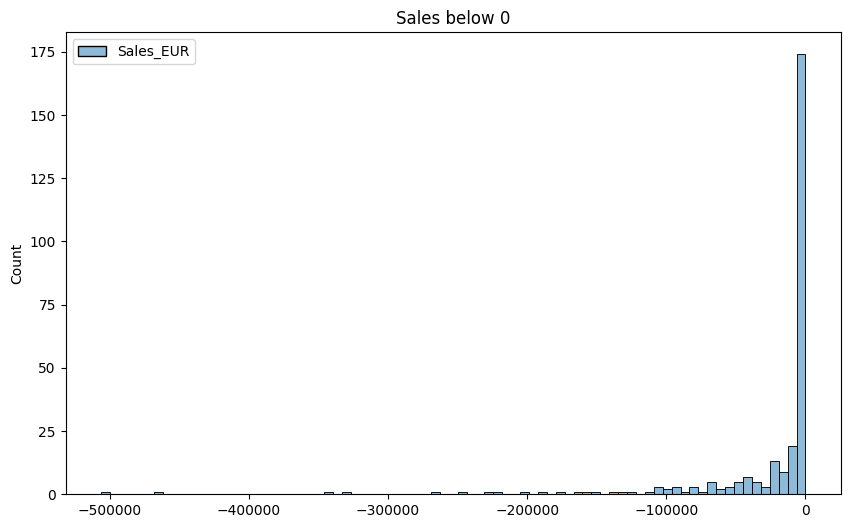

In [108]:
# lets plot the sales bellow 0
plt.figure(figsize=(10, 6))
sns.histplot(sales_data[sales_data['Sales_EUR'] < 0])
plt.title('Sales below 0')
plt.show()

In [109]:
# We will try to change the minus values to positive values
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].abs()

276 rows of our sales data has a negative number which is not possible a possible soluction is to change the number to positive or erase the rows

In [110]:
sales_data[sales_data['Sales_EUR'] == 0].shape

(7134, 3)

We have 7134 rows where the amount of revenue is zero so we should remove them

In [111]:
# removing the rows with 0 sales
sales_data = sales_data[sales_data['Sales_EUR'] != 0]

In [112]:
total_sales_sum = sales_data['Sales_EUR'].groupby(sales_data['Mapped_GCK']).sum()
total_sales_sum

Mapped_GCK
#1    1549316214
#11     66938781
#12      8310462
#13      1009543
#14       520109
#16     18968054
#20        78406
#3     535849954
#36      1025385
#4      15857024
#5     434347993
#6      21484444
#8      35023959
#9        329196
Name: Sales_EUR, dtype: float64

REMINDER TO CHANGE THE SCALE

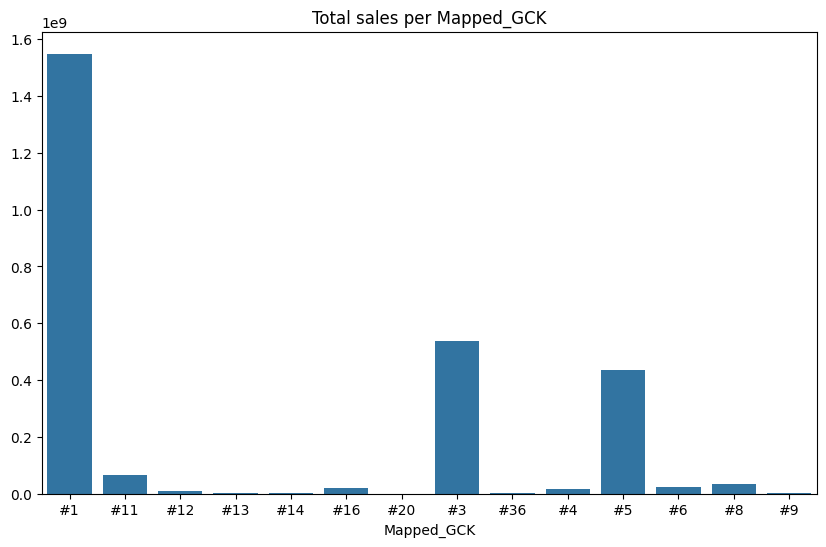

In [113]:
# lets plot the total sales per Mapped_GCK
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_sum.index, y=total_sales_sum.values)
plt.title('Total sales per Mapped_GCK')
plt.show()

In [114]:
total_sales_mean = sales_data['Sales_EUR'].groupby(sales_data['Mapped_GCK']).mean()
total_sales_mean

Mapped_GCK
#1    5079725
#11    440387
#12     47488
#13      7160
#14      7430
#16     59091
#20       912
#3    2022075
#36      7540
#4      67765
#5    1677019
#6     110177
#8     156357
#9       3135
Name: Sales_EUR, dtype: float64

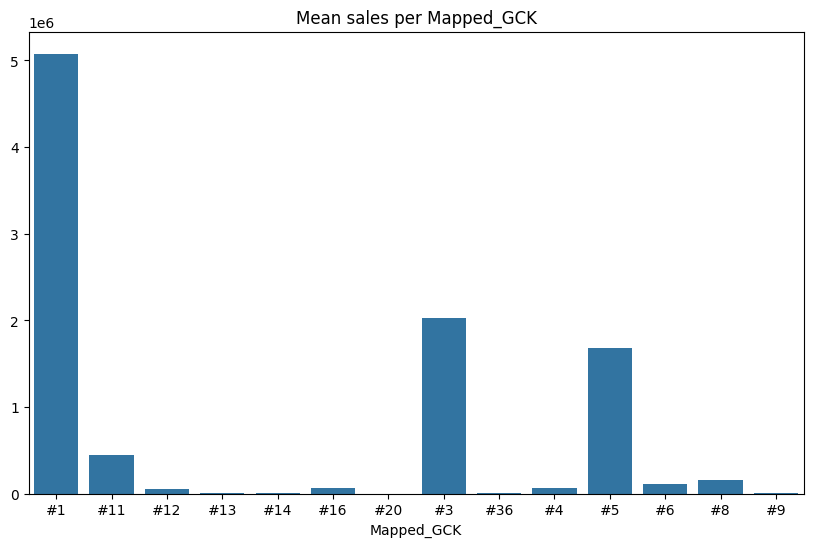

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_mean.index, y=total_sales_mean.values)
plt.title('Mean sales per Mapped_GCK')
plt.show()

In [ ]:
total_sales_median = sales_data['Sales_EUR'].groupby(sales_data['Mapped_GCK']).median()
total_sales_median
# is it because of the negative sales or zero sales? -- Resolved with the removel of sales with zero revenue and abs of negative sales

Mapped_GCK
#1     717291
#11    261825
#12     28686
#13      3600
#14      2983
#16     17443
#20       348
#3    1914833
#36      2656
#4      50332
#5     775689
#6      40088
#8     117962
#9       1632
Name: Sales_EUR, dtype: float64

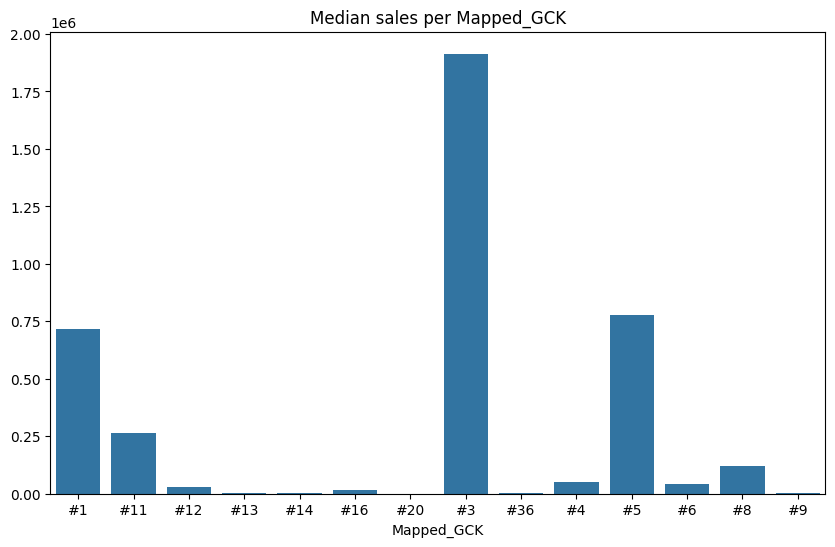

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_median.index, y=total_sales_median.values)
plt.title('Median sales per Mapped_GCK')
plt.show()